# Dates and Times

## EOSC 211

**Week ? Day ?**

**Learning Objectives:**  
1. describe what the unix epoch is
2. convert from strings, unix epoch to arrow objects and back
3. use built in functions to calculate timedeltas

Very frequently we encounter *time series* data in the earth, ocean and atmospheric sciences. Here we will practice parsing dates and times with python, and use the *Arrow* library to convert between several different possible date and time formats. Finally, we will use our skills to generate a plot of a real dataset and do some calculations using *Arrow datetime objects.*

In [1]:
import arrow
import numpy as np
from matplotlib import pyplot as plt

### Question 1

**Write today's date and the current time in 5 different ways. Which is the easiest to read for you? Which would be the easiest to parse with a computer?**

your answer here

**andrew's soln**

15:45 August 17th, 2021 << my favorite

2021-08-17 3:45pm 

1545.8.17.21

17/08/21 15:45:21 << probably easiest to compute? 

quarter to four in the afternoon on the seventeenth day of august in year of our lord, two thousand twenty one

### Question 2

**It turns out there isn't a definative "official" format for writing dates and times; over the years there have been many different strategies that have been developed for handling dates and times with a computer. One popular format is *UNIX time* (aka POSIX time, aka UNIX epoch), which is the number of seconds that have passed since 00:00 on January 1st, 1970. What is the current date/time written in UNIX epoch format? (Useful tools exist online to help you with this)**

your answer here

**andrew's soln**

1629240717

### Question 3

**Python has several *packages* for handling dates and times and converting between formats. In this course, we will be using *Arrow*. Read the documentation [here](https://arrow.readthedocs.io/en/latest/) to get familiar with some of Arrow's build in functions, or type `help(arrow)` into a cell. Convert the following dates into *arrow date objects*:**

**Important Dates in History:**

My birthday: `763171200`

First Documented Coronavirus Case: `'November 17, 2019'`

SpaceX Inspiration 4 scheduled launch: `'0900 09/14/21'`

In [2]:
# your code here

In [3]:
# andrew's soln
# birthday
birthday = arrow.get(763171200)
birthday

<Arrow [1994-03-09T00:00:00+00:00]>

In [4]:
# covid 
covid_start = arrow.get('Nov 17, 2019', 'MMM DD, YYYY')
covid_start

<Arrow [2019-11-17T00:00:00+00:00]>

In [5]:
# spacex
launch = arrow.get('0900 09/14/21', 'hhmm MM/DD/YY')
launch

<Arrow [2021-09-14T09:00:00+00:00]>

### Question 4

**How old are you (in years)? How long ago did the pandemic start (in years and days)? Find/display the answer using the built in `humanize()` function**

In [6]:
# age
now = arrow.now('US/Pacific')
now.humanize(birthday, only_distance=True)

'27 years'

In [7]:
# pandemic
covid_start.humanize(now, granularity=["year","day"])

'a year and 275 days ago'

In [8]:
# get some timeseries data (hide this cell later)
# data is modified from AEROCAN station at Waskesiu, SK. (Andrew's research with Ian)

AOD_dates = np.array(
    [
        "2019-06-12 19:03",
        "2019-06-12 19:05",
        "2019-06-12 19:12",
        "2019-06-12 19:33",
        "2019-06-12 21:50",
        "2019-06-12 22:20",
        "2019-06-12 22:42",
        "2019-06-12 22:54",
        "2019-06-12 22:57",
        "2019-06-12 23:03",
        "2019-06-12 23:05",
        "2019-06-13 14:21",
        "2019-06-17 13:51",
        "2019-06-17 14:00",
        "2019-06-17 14:03",
        "2019-06-17 15:30",
        "2019-06-17 15:33",
        "2019-06-17 15:35",
        "2019-06-17 15:39",
        "2019-06-17 15:48",
        "2019-06-17 16:48",
        "2019-06-17 16:50",
        "2019-06-17 16:54",
        "2019-06-17 17:09",
        "2019-06-17 17:20",
    ]
)

AOD_data = np.array(
    [
        0.262725,
        0.277939,
        0.264587,
        0.253328,
        0.269569,
        0.267441,
        0.248769,
        0.263718,
        0.264954,
        0.268052,
        0.254893,
        0.245502,
        0.085446,
        0.082944,
        0.082188,
        0.100134,
        0.097456,
        0.098366,
        0.098205,
        0.101035,
        0.115508,
        0.113655,
        0.11288,
        0.122015,
        0.117067,
    ]
)

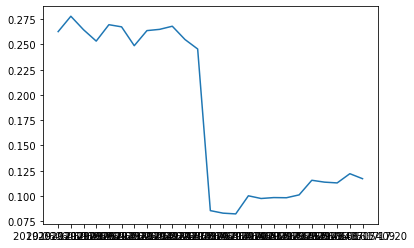

In [9]:
plt.plot(AOD_dates, AOD_data)

In [13]:
parsed_dates = np.empty_like(AOD_dates)
for _, date in enumerate(AOD_dates):
    parsed_dates[_] = arrow.get(date).format('HH:mm')

parsed_dates

array(['19:03', '19:05', '19:12', '19:33', '21:50', '22:20', '22:42',
       '22:54', '22:57', '23:03', '23:05', '14:21', '13:51', '14:00',
       '14:03', '15:30', '15:33', '15:35', '15:39', '15:48', '16:48',
       '16:50', '16:54', '17:09', '17:20'], dtype='<U16')

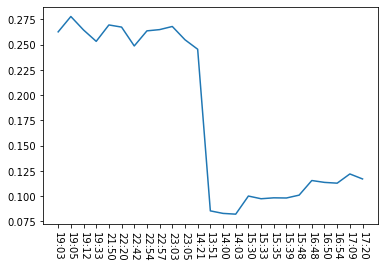

In [11]:
plt.plot(parsed_dates, AOD_data)
plt.xticks(rotation=-90);